# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [41]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
import json
from pprint import pprint
# Impor the OpenWeatherMap API key
from api_keys import weather_api_key

# Import citipy to determine the cities based on latitude and longitude
from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [42]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 564


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [43]:
# Set the API base URL
url = "http://api.openweathermap.org/data/2.5/weather?"

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1

# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url =f"{url}&q={city}&units=metric&appid={weather_api_key}"
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_get = requests.get(city_url)
        city_weather = city_get.json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["humidity"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["sys"]["country"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Beginning Data Retrieval     
-----------------------------
Processing Record 1 of Set 1 | vilyuchinsk
Processing Record 2 of Set 1 | adamstown
Processing Record 3 of Set 1 | egilsstadir
Processing Record 4 of Set 1 | grytviken
Processing Record 5 of Set 1 | albany
Processing Record 6 of Set 1 | williston
Processing Record 7 of Set 1 | lihue
Processing Record 8 of Set 1 | hawaiian paradise park
Processing Record 9 of Set 1 | sao miguel
Processing Record 10 of Set 1 | margaret river
Processing Record 11 of Set 1 | invercargill
Processing Record 12 of Set 1 | la punta
Processing Record 13 of Set 1 | weno
Processing Record 14 of Set 1 | revda
Processing Record 15 of Set 1 | calvi
Processing Record 16 of Set 1 | thompson
Processing Record 17 of Set 1 | kargil
Processing Record 18 of Set 1 | sihanoukville
Processing Record 19 of Set 1 | waitangi
Processing Record 20 of Set 1 | juan de ayolas
Processing Record 21 of Set 1 | west island
Processing Record 22 of Set 1 | kismayo
Processing Recor

Processing Record 43 of Set 4 | pointe-noire
Processing Record 44 of Set 4 | cidreira
Processing Record 45 of Set 4 | mount pearl
Processing Record 46 of Set 4 | haiku-pauwela
Processing Record 47 of Set 4 | minas de marcona
Processing Record 48 of Set 4 | ar rutbah
Processing Record 49 of Set 4 | ciudad lazaro cardenas
Processing Record 0 of Set 5 | miquelon
Processing Record 1 of Set 5 | varamin
Processing Record 2 of Set 5 | oak hill
Processing Record 3 of Set 5 | keelung
Processing Record 4 of Set 5 | port moresby
Processing Record 5 of Set 5 | ayorou
Processing Record 6 of Set 5 | ola
Processing Record 7 of Set 5 | bluefields
Processing Record 8 of Set 5 | saldanha
Processing Record 9 of Set 5 | kidal
Processing Record 10 of Set 5 | argo
Processing Record 11 of Set 5 | muroto-misakicho
Processing Record 12 of Set 5 | flying fish cove
Processing Record 13 of Set 5 | tharad
Processing Record 14 of Set 5 | shitanjing
Processing Record 15 of Set 5 | tayoltita
Processing Record 16 of S

City not found. Skipping...
Processing Record 34 of Set 8 | muntok
Processing Record 35 of Set 8 | newman
Processing Record 36 of Set 8 | chilmari
Processing Record 37 of Set 8 | nuuk
Processing Record 38 of Set 8 | jining
Processing Record 39 of Set 8 | sokoni
Processing Record 40 of Set 8 | tubarjal
Processing Record 41 of Set 8 | daru
Processing Record 42 of Set 8 | charters towers
Processing Record 43 of Set 8 | nova sintra
Processing Record 44 of Set 8 | san fernando de apure
Processing Record 45 of Set 8 | noosa heads
Processing Record 46 of Set 8 | paraiso
Processing Record 47 of Set 8 | cairns city
City not found. Skipping...
Processing Record 48 of Set 8 | el hamma
Processing Record 49 of Set 8 | harstad
Processing Record 0 of Set 9 | sao joao da barra
Processing Record 1 of Set 9 | acajutla
Processing Record 2 of Set 9 | howard springs
Processing Record 3 of Set 9 | aitape
Processing Record 4 of Set 9 | kingston
Processing Record 5 of Set 9 | tateyama
Processing Record 6 of S

In [44]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()


City          542
Lat           542
Lng           542
Max Temp      542
Humidity      542
Cloudiness    542
Wind Speed    542
Country       542
Date          542
dtype: int64

In [45]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,vilyuchinsk,52.9306,158.4028,8.85,93,100,6.65,RU,1696277244
1,adamstown,-25.0660,-130.1015,19.85,76,72,11.07,PN,1696277245
2,egilsstadir,65.2653,-14.3948,4.56,99,100,2.77,IS,1696277314
3,grytviken,-54.2811,-36.5092,2.64,97,100,5.84,GS,1696277407
4,albany,42.6001,-73.9662,25.51,50,44,0.89,US,1696276611


In [46]:
# Export the City_Data into a csv
city_data_df.to_csv("../output_data/cities.csv", index_label="City_ID")

In [47]:
# Read saved data
city_data_df = pd.read_csv("../output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,8.85,93,100,6.65,RU,1696277244
1,adamstown,-25.0660,-130.1015,19.85,76,72,11.07,PN,1696277245
2,egilsstadir,65.2653,-14.3948,4.56,99,100,2.77,IS,1696277314
3,grytviken,-54.2811,-36.5092,2.64,97,100,5.84,GS,1696277407
4,albany,42.6001,-73.9662,25.51,50,44,0.89,US,1696276611


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

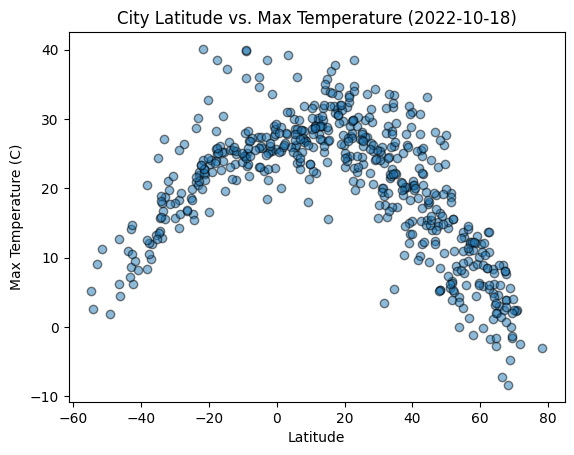

In [48]:
# Build scatter plot for latitude vs. temperature
x_values=city_data_df["Lat"]
y_values=city_data_df["Max Temp"]
# Incorporate the other graph properties
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
# Add Labels and Title
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (C)")
plt.title("City Latitude vs. Max Temperature (2022-10-18)")
# Save the figure
plt.savefig("../output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

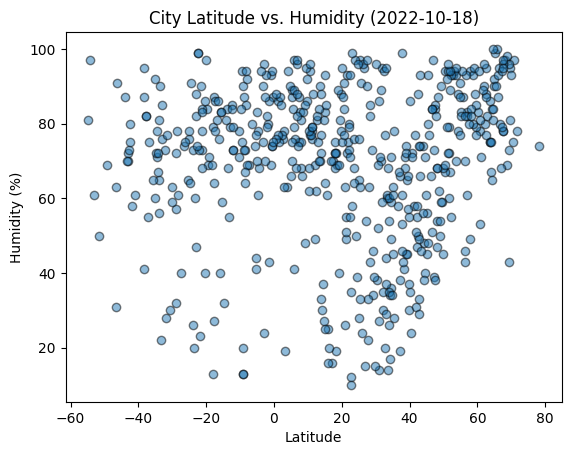

In [49]:
# Build the scatter plots for latitude vs. humidity
x_values=city_data_df["Lat"]
y_values=city_data_df["Humidity"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)

# Add Labels and Title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Humidity (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

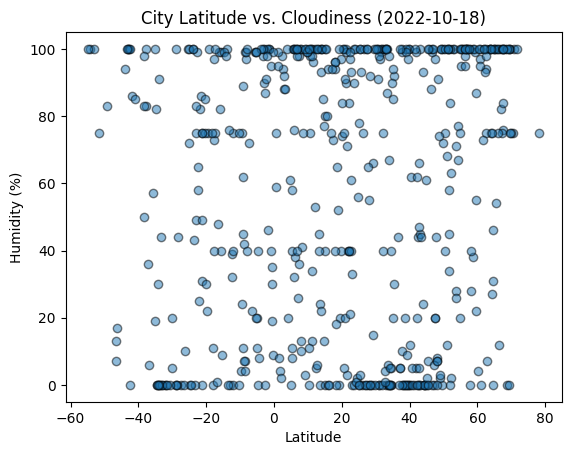

In [50]:
# Build the scatter plots for latitude vs. cloudiness
x_values=city_data_df["Lat"]
y_values=city_data_df["Cloudiness"]

# Incorporate the other graph properties
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)

# Add Labels and Title
plt.xlabel("Latitude")
plt.ylabel("Humidity (%)")
plt.title("City Latitude vs. Cloudiness (2022-10-18)")

# Save the figure
plt.savefig("../output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

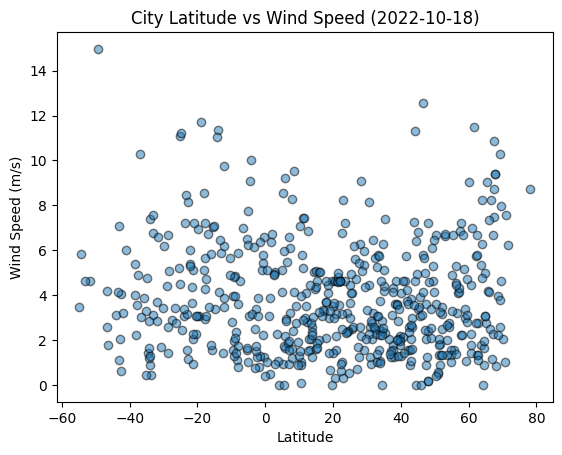

In [51]:
# Build the scatter plots for latitude vs. wind speed
x_values=city_data_df["Lat"]
y_values=city_data_df["Wind Speed"]
# Incorporate the other graph properties
plt.scatter(x_values,y_values,edgecolors="black",alpha=0.5)
plt.title("City Latitude vs Wind Speed (2022-10-18)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed (m/s)")
# Save the figure
plt.savefig("../output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [52]:
# Define a function to create Linear Regression plots
def linear_regress(x,y,eqn_coordinates):
    r=st.pearson(x,y)
    print(f"The r-value is {r[0]}")
    (slope,intercept,rvalue,pvalue,stderr) = linregress(x,y)
    regress_values= x * slope + intercept
    line_eq=f" y = {slope:.2f}x + {intercept:.2f}"
    plt.plot(x,regress_values,"r-")
    plt.annotate(line_eq,eqn_coordinates, fontsize= 10, color= "red")
    plt.scatter(x,y)
    plt.xlabel(f"{x.name}")
    plt.ylabel(f"{y.name}")

In [53]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df=city_data_df.loc[city_data_df["Lat"] >= 0 ]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,vilyuchinsk,52.9306,158.4028,8.85,93,100,6.65,RU,1696277244
2,egilsstadir,65.2653,-14.3948,4.56,99,100,2.77,IS,1696277314
4,albany,42.6001,-73.9662,25.51,50,44,0.89,US,1696276611
5,williston,48.1470,-103.6180,16.41,47,8,2.40,US,1696277287
6,lihue,21.9789,-159.3672,27.58,75,40,4.63,US,1696277253


In [54]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df=city_data_df.loc[city_data_df["Lat"] < 0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
1,adamstown,-25.0660,-130.1015,19.85,76,72,11.07,PN,1696277245
3,grytviken,-54.2811,-36.5092,2.64,97,100,5.84,GS,1696277407
8,sao miguel,-5.4667,-35.3667,27.43,74,99,6.49,BR,1696277119
9,margaret river,-33.9500,115.0667,12.82,65,91,7.38,AU,1696277407
10,invercargill,-46.4000,168.3500,4.45,91,17,1.79,NZ,1696277407


###  Temperature vs. Latitude Linear Regression Plot

r-value is: -0.8237118998874534


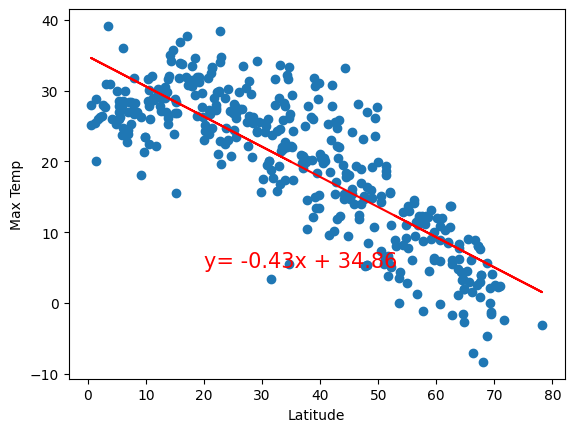

In [55]:
# Linear regression on Northern Hemisphere
#Convert temp and latitude to x and y values
x_values= northern_hemi_df['Lat']
y_values=northern_hemi_df['Max Temp']

# Run linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,5),fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r value
print(f"r-value is: {rvalue}")
# Show plot
plt.show()

r-value is: 0.7801421919066576


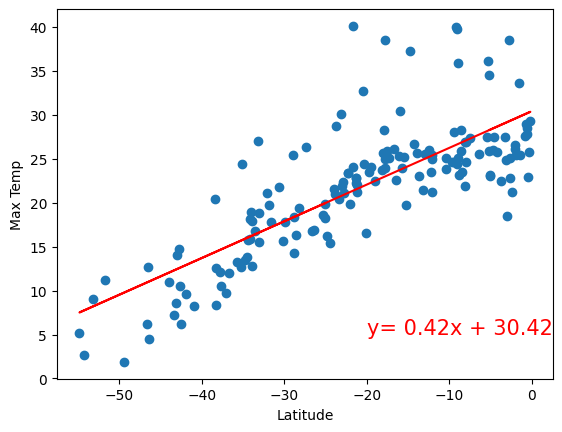

In [56]:
# Linear regression on Southern Hemisphere
#Convert windspeed and latitude to x and y values
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Max Temp']


# Run linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-20,5),fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Max Temp")

# Print r value
print(f"r-value is: {rvalue}")
# Show plot
plt.show()

**Discussion about the linear relationship:** There is a slightly strong positive correlation between max temperature and latitude in the southern hemisphere. In the northern hemisphere, there is a slightly strong negative correlation between max temperature and latitude.

### Humidity vs. Latitude Linear Regression Plot

r-value is: 0.1546162485459873


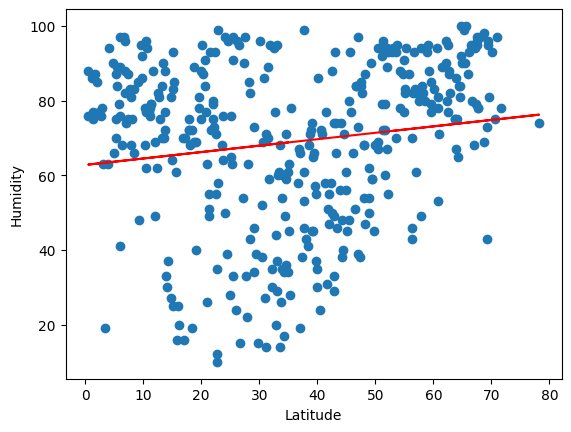

In [57]:
# Northern Hemisphere
#Convert humidity and latitude to x and y values
x_values= northern_hemi_df['Lat']
y_values=northern_hemi_df['Humidity']


# Run linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(50,5),fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Print r value
print(f"r-value is: {rvalue}")
# Show plot
plt.show()

r-value is: 0.08626028484542887


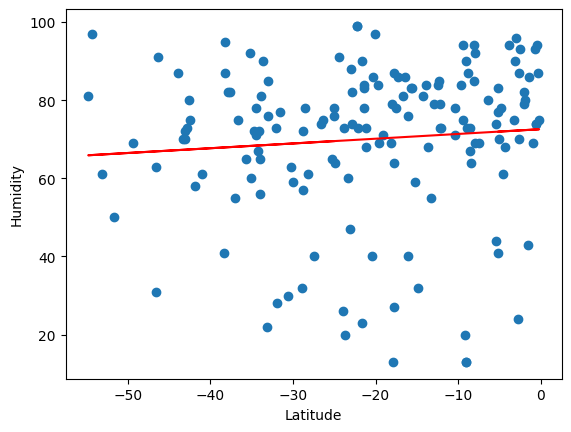

In [58]:
# Southern Hemisphere
#Convert windspeed and latitude to x and y values
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Humidity']

# Run linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Humidity")

# Print r value
print(f"r-value is: {rvalue}")
# Show plot
plt.show()

**Discussion about the linear relationship:** There is a very weak correlation between humidity and latitude in the southern hemisphere and in the northern hemisphere. 

### Cloudiness vs. Latitude Linear Regression Plot

r-value is: 0.07923017610924657


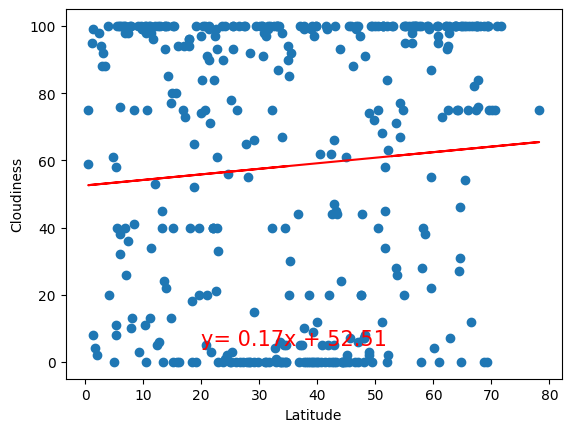

In [59]:
# Northern Hemisphere
#Convert windspeed and latitude to x and y values
x_values= northern_hemi_df['Lat']
y_values=northern_hemi_df['Cloudiness']

# Run linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,5),fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r value
print(f"r-value is: {rvalue}")
# Show plot
plt.show()

r-value is: 0.03143931359447928


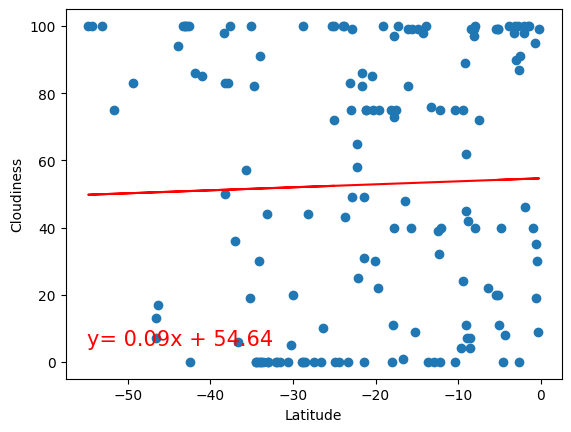

In [60]:
# Southern Hemisphere
#Convert windspeed and latitude to x and y values
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Cloudiness']


# Run linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-55,5),fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Cloudiness")

# Print r value
print(f"r-value is: {rvalue}")
# Show plot
plt.show()

**Discussion about the linear relationship:** There is a weak correlation between the cloudiness and latitude in the southern hemisphere and northern hemisphere.

### Wind Speed vs. Latitude Linear Regression Plot

r-value is: 0.13440068265222654


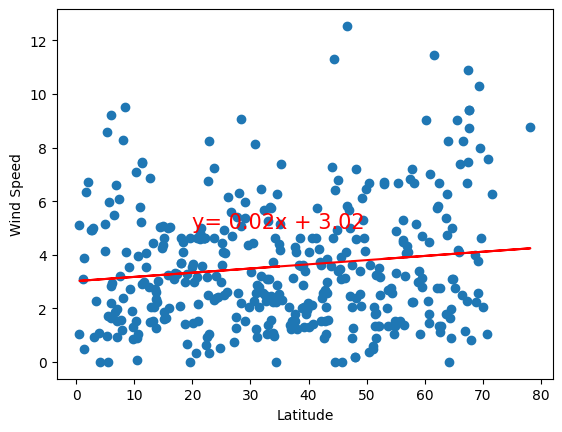

In [61]:
# Northern Hemisphere
#Convert windspeed and latitude to x and y values
x_values= northern_hemi_df['Lat']
y_values= northern_hemi_df['Wind Speed']

# Run linear regression
(slope,intercept,rvalue,pvalue,stderr) = linregress(x_values,y_values)
regress_values=x_values*slope + intercept
line_eq="y= " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(20,5),fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r value
print(f"r-value is: {rvalue}")
# Show plot
plt.show()

r-value is: -0.039765722024495985


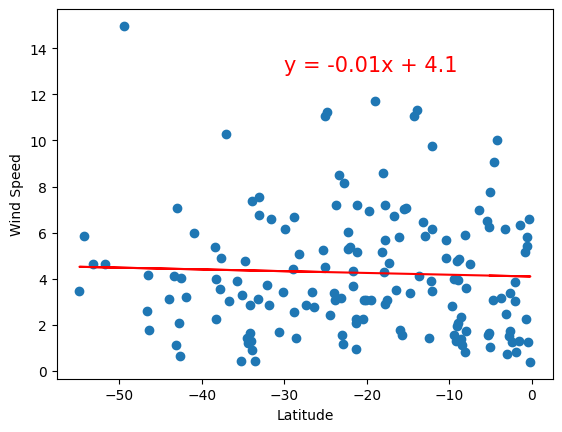

In [62]:
# Southern Hemisphere
#Convert windspeed and latitude to x and y values
x_values= southern_hemi_df['Lat']
y_values= southern_hemi_df['Wind Speed']

# Run linear regression
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

# Plot scatter plot
plt.scatter(x_values, y_values)

# Plot regression line
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(-30,13),fontsize=15, color="red")

# Label plot
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")

# Print r value
print(f"r-value is: {rvalue}")
# Show plot
plt.show()

**Discussion about the linear relationship:** There is a negative and very weak correlation between wind speed and latitude in the southern hemisphere.Same with the northern hemisphere, there is a positive and very weak correlation between wind speed and latitude. 